<a href="https://colab.research.google.com/github/imcuky/Classification/blob/main/Classification_Empirical_Study_Na%C3%AFve_Bayes_vs_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classification Empirical Study: Naïve Bayes vs Logistic Regression**

**Author: Catherine Lee**<br>
catherine.lee.le@gmail.com

##**1. Classification task and the dataset**

###**a. Goal of The Task**


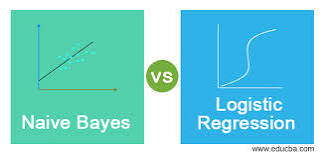</img>

Source: https://www.educba.com/naive-bayes-vs-logistic-regression/

The process of purchasing a car is a multifaceted task that requires careful consideration of several factors, including reliability, performance, safety, and price. One of the most challenging aspects of this process is evaluating the available options. Our dataset simulates a real-world scenario where individuals appraise and make decisions about car purchases based on multiple criteria.

In this Jupyter Notebook, an empirical study is presented to compare **discriminative** and **generative** models evaluated on a [Car Evaluation Database](https://archive.ics.uci.edu/dataset/19/car+evaluation) hosted at UC Irvine Repository. The dataset provides valuable insights to the learners about the factors that influence car buying decisions.The primary focus is to obtain the best classification performance in order to predict the acceptability of a car based on its characteristics. The goal of the task is to set up an experimental classification problem and explore on different parameters on discriminative and generative classification algorithms. Six different models will be used and compared to provide an accurate estimate of a class based on the given information.

###**b.The Dataset**


The models will be train and compare with the proposed classification dataset under the data sources hosted at [UC Irvine Repository](https://archive.ics.uci.edu/dataset/19/car+evaluation)
.


Import important libraries

In [ ]:
import pandas as pd
import numpy as np
import random
import sklearn as sk

Read Dataset

In [ ]:
url = "https://raw.githubusercontent.com/imcuky/Datasets/main/car.csv"

dataset = pd.read_csv(url)

The 10-item raw source data is shown.

In [ ]:
dataset.head(10) # Show the first 10 rows of the dataset to understand the dataframe's structure


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


The dataset contains of a total of 1728 data samples and 7 variables.

In [ ]:
dataset.shape

(1728, 7)

The variables in the dataframe.

| Variable Name | Role | Type | Demographic | Description | Units | Missing Values |
| --- | --- | --- | --- | --- | --- | --- |
| buying | Feature | Categorical |  | buying price |  | no |
| maint | Feature | Categorical |  | price of the maintenance |  | no |
| doors | Feature | Categorical |  | number of doors |  | no |
| persons | Feature | Categorical |  | capacity in terms of persons to carry |  | no |
| lug_boot | Feature | Categorical |  | the size of luggage boot |  | no |
| safety | Feature | Categorical |  | estimated safety of the car |  | no |
| class	| Target	| Categorical	|	| evaulation level (unacceptable, acceptable, good, very good)	|	| no |


The dataset comprises 7 variables, none of which contain any missing values. Each variable is assigned a **Role** and a **Type**. The Role indicates whether the data serves as a Feature or a Target, and whether it represents a class that our model will predict based on the provided feature attributes. The Type determines the attribute type. In this context, all our attributes have the type "Categorical," which means that each variable has its own category, for instance, **class** has an evaulation level of unacceptable, acceptable, good, and very good.

##**2. Feature engineering**

Our attributes are categorical features, meaning they do not have numerical ranges like continuous or numerical variables. These features represent specific categories or labels, and do not possess inherent numerical values that can be compared linearly or scaled. As a result, categorical features can be easily converted into discrete attributes.

We discussed that all of our variable has a type of Categorical. Let's see what category that each variables contains.

> Variable Information

- **buying**: vhigh, high, med, low.
- **maint**: vhigh, high, med, low.
- **doors**: 2, 3, 4, 5more.
- **persons**: 2, 4, or more.
- **lug_boot**: small, med, big.
- **safety**: low, med, high.

> Class Labels

- **unacc**
- **acc**
- **good**
- **vgood**


In order to identify potential features and evaluate existing ones, it is valuable to have domain knowledge. When considering the buying price of a car, it is important to note that a higher cost may decrease acceptability for people who have budget constraints. However, if a higher price brings higher quality, the acceptability may decrease, but not by much since there is a trade-off. Similarly, the higher cost of maintaining a car can also affect its acceptability. However, unlike the buying price, there is no trade-off for maintenance cost, as higher costs mean lower quality.

The concept of 2-door and 4-door cars is well known, but there are other options that may not be understood. In a hatchback, the hatch is typically considered a door. Therefore, a hatchback with two passenger doors is referred to as a "three-door," while a hatchback with four passenger doors is labeled as a "five-door." Hatchbacks can provide easy access to the primary interior of the vehicle, serving as a cargo area rather than merely accessing a separate trunk. The choice between 4-door vs. 5-door cars and 2-doors vs. 3-doors may depend on the car's utility and appeal with different preferences for each.

The capacity of the car seems an important consideration for acceptability. The buyer's family size or intended usage can influence the choice of a car. For example, a person with a larger family may prefer a car with more seating capacity, while someone who live singly may prefer a car with better fuel efficiency, which is a small capacity. Although practicability is a concern, it ultimately depends on the individual's preferences.

The luggage boot of a car is related to its size and can bring practicability, increasing priority. A larger car tends to have a larger luggage boot, which is beneficial for those who need more storage space. However, having a larger luggage boot can also decrease fuel efficiency, which may not be desirable for some buyers.

Lastly, safety is a significant concern for car evaulation. Car user want to make sure that the car they are purchasing is safe for themselves. Safety features such as airbags, anti-lock brakes, and backup cameras are becoming increasingly important for car buyers. Additional safety features, such as blind spot warning and lane departure warning, which can increase the evaulation level of the car for some buyers.




It is assumed that the features, **buying**, **maint** and **safety** are significant for the classification task, while **doors** is the least significant. However, since the dataset comprises only 6 features, it is difficult to determine whether the elimination of one feature will affect the others. Therefore, all features will be kept for the analysis.

*List Source from domain expertise: [Hatchback](https://en.wikipedia.org/wiki/Hatchback), [Car Safety Features](https://mycardoeswhat.org/safety-features/)*

##**3. Encode the features**

###**a. Data encoding and transformation**


We have saw that each attribute in our dataset is categorical, which means it can be decoded into a discrete form. To achieve this, we can assign an index to each string category in the attribute. For example, the buying attribute with the categories "vhigh", "high", "med", and "low," we can assign the values 0, 1, 2, and 3 to each of these categories, respectively. For classifiers that require continuous attributes, we can use one-hot encoding by creating a binary vector for each category in the attribute. For example, the buying attribute with the categories "vhigh", "high", "med", and "low," the vector for "vhigh" would be [1, 0, 0, 0], the vector for "high" would be [0, 1, 0, 0], the vector for "med" would be [0, 0, 1, 0], and the vector for "low" would be [0, 0, 0, 1].

###**b. continuous attributes**




For Logistic Regression classifier, it expects continuous attributes. We will use one-hot encoding for our attributes by converting each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns.

In [ ]:
def defineLR():

  '''
    Apply the one-hot encoding on the dataset and assign it to a global variable onehot
  '''
  # define the global variables
  # 'onehot' contains the dataframe after applying the onehot encoding on the original dataframe
  global onehot

  #reset the dataset to make sure the data is not modified
  dataset = pd.read_csv(url)

  # convert categorical variable into dummy/indicator variables.
  onehot = pd.get_dummies(dataset, columns =['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

  # reset the dataset back to it's initial form
  dataset = pd.read_csv(url)


Let's see the attributes after applying one hot encoding.

In [ ]:
defineLR()# apply the encoding
onehot.columns# display all the columns for onehot

Index(['class', 'buying_high', 'buying_low', 'buying_med', 'buying_vhigh',
       'maint_high', 'maint_low', 'maint_med', 'maint_vhigh', 'doors_2',
       'doors_3', 'doors_4', 'doors_5more', 'persons_2', 'persons_4',
       'persons_more', 'lug_boot_big', 'lug_boot_med', 'lug_boot_small',
       'safety_high', 'safety_low', 'safety_med'],
      dtype='object')

In [ ]:
onehot # Show the encoded of the dataset to understand the dataframe's structure

,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
1,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
2,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
3,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,good,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,vgood,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,unacc,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,good,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1


We see that each attribute is converted into serval new categorical column and assign a binary value of 1 or 0 to those columns.

###**c. discrete attributes**

For Naive Bayes classifiers expects discrete attributes. Assign each categorical with a integer index by assigning a unique numerical value to each category of the variable.
The following table shows the encoded value for the original values, as we can see each values is assigned to a unique index in the category.

| Attribute   | Original Values           | New Values       |
|-------------|---------------------------|------------------|
| buying      | vhigh, high, med, low     | 0, 1, 2, 3       |
| maint       | vhigh, high, med, low     | 0, 1, 2, 3       |
| doors       | 2, 3, 4, 5more                     | 0, 1, 2, 3                |
| persons     | 2, 4, or more                      | 0, 1, 2                |
| lug_boot    | small, med, big           | 0, 1, 2          |
| safety      | low, med, high            | 0, 1, 2          |
| class       | unacc, acc, good, vgood   | 0, 1, 2, 3       |


In [ ]:
def defineNB():

  '''
  Apply the discretization encoding on the dataset and assign the result on a global varible 'discretization'

  '''
  # define the global variables
  # discretization contains the dataframe after applying the discretization encoding
  global discretization

  # reset the dataset to make sure the data is not modified
  dataset = pd.read_csv(url)

  # Encode each categorical into an index form
  dataset["buying"] = dataset["buying"].replace({"vhigh": 0, "high": 1, "med": 2, "low": 3})
  dataset["maint"] = dataset["maint"].replace({"vhigh": 0, "high": 1, "med": 2, "low": 3})
  dataset["doors"] = dataset["doors"].replace({ "2": 0, "3":1, "4": 2,"5more":3})
  dataset["persons"] = dataset["persons"].replace({"2": 0, "4": 1,"more":2})
  dataset["lug_boot"] = dataset["lug_boot"].replace({"small":0, "med":1, "big":2})
  dataset["safety"] = dataset["safety"].replace({"low":0, "med":1, "high":2})

  # assigned the discretization form of the dataframe into 'discretization'
  discretization = dataset

  # reset the dataset back to it's initial form
  dataset = pd.read_csv(url)

In [ ]:
defineNB()# apply the encoding
discretization # Show the encoded of the dataset to understand the dataframe's structure

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,unacc
1,0,0,0,0,0,1,unacc
2,0,0,0,0,0,2,unacc
3,0,0,0,0,1,0,unacc
4,0,0,0,0,1,1,unacc
...,...,...,...,...,...,...,...
1723,3,3,3,2,1,1,good
1724,3,3,3,2,1,2,vgood
1725,3,3,3,2,2,0,unacc
1726,3,3,3,2,2,1,good


##**4. Define 2 models using default parameters**

Import important libraries for this section.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB

Define the models using the default parameters (no parameter are passing to the models).

###**a. Logistic Regression Model**

In [ ]:
ModelLR = LogisticRegression() # define the Logistic Regression model with default parameters

In [ ]:
ModelLR.get_params()# view the parameter value for each

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

###**b. Naïve Bayes Model**

In [ ]:
ModelNB = CategoricalNB() # define the Naïve Bayes model with default parameters

In [ ]:
ModelNB.get_params() # view the parameter value for each

{'alpha': 1.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn',
 'min_categories': None}

##**5. Train/test/evaluate the 2 models in cross-validation**


To evaluate the performance of a model, we will utilize a 4-fold cross-validation technique, which involves dividing the data sample into four equal parts or 'folds'. During each iteration of cross-validation, three folds will be used for training the model, while the remaining one will be used for testing (validation set). The accuracy will be calculated across the test data to assess the model's performance.

It's often challenging to obtain a realistic test dataset to evaluate the model's performance. Nonetheless, validation can be employed to split the data sample into training and testing sets. The original sample data can be divided into two portions, namely the training and test data. Subsequently, the model can be trained using the training data and evaluated using the test data to determine its performance.
The accuracy, precision, and recall metrics will be computed across the test data to evaluate the model's performance.

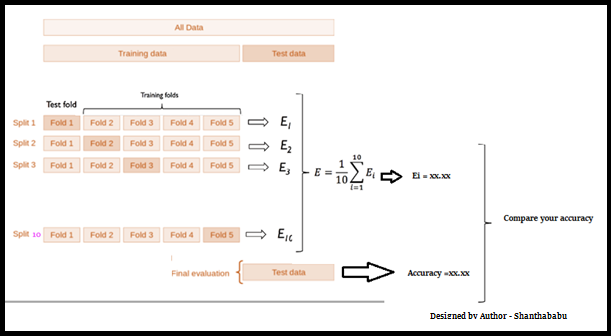

Source: https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/

###**a. 4-fold cross-validation**


Import important libraries for this section.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score,   precision_recall_curve
from sklearn.utils.multiclass import unique_labels

####**i. Fully Shuffles the two data frame aligned**

We want to make sure the trianing and test data for both model is the same in order for comparison.

In [ ]:
from random import shuffle

# set a seed to make sure we get the same random for each run
random.seed(100)

# random shuffle the row index by random
index_shuffle=[i for i in range(onehot.shape[0])]
shuffle(index_shuffle)

In [ ]:
# assigned the encoded dataframe into a temp variable
temp_lr = onehot
temp_nb = discretization

#applied the shuffled row index to the temp datasets
shuffle_lr = temp_lr.iloc[index_shuffle,:]
shuffle_nb = temp_nb.iloc[index_shuffle,:]

In [ ]:
shuffle_lr.head(5) # show the first 5 rows from the shuffled dataset for logistic regression

,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
1548,unacc,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
423,unacc,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
868,unacc,0,0,1,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
110,unacc,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
1531,unacc,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
shuffle_nb.head(5) # show the first 5 rows from the shuffled dataset for naive bayes

,buying,maint,doors,persons,lug_boot,safety,class
1548,3,2,1,1,0,0,unacc
423,0,3,3,2,0,0,unacc
868,2,0,0,0,1,1,unacc
110,0,1,0,0,0,2,unacc
1531,3,2,0,2,0,1,unacc


As we can observe, the datasets are shuffled in the same amount.

####**ii. Spilt the data set into Training data and Test data**

Split the data such that 2/3 is used for training set and 1/3 is used for testing set.

Recall that we do not use this test set when building the model, only the training set.

In [ ]:
# calculate the index at which to split the data
split_idx = int(2/3 * len(shuffle_lr))

In [ ]:
#split the data into train and test for Logistic regression
lr_train = shuffle_lr.iloc[:split_idx]
lr_test = shuffle_lr.iloc[split_idx:]

#split the data into train and test for Naive Bayes
nb_train = shuffle_nb.iloc[:split_idx]
nb_test = shuffle_nb.iloc[split_idx:]

Defines the Training data and the Test data for LR

In [ ]:
#training set (what we will use to train the model)
lr_X = lr_train.iloc[:,1:22]
lr_y = lr_train.iloc[:,0:1]

#testing set (what we will use to test the trained model)
X_test_lr = lr_test.iloc[:,1:22]
y_test_lr = lr_test.iloc[:,0:1]

#convert the "class" column into a signal array
lr_y = lr_y.values.ravel()
y_test_lr = y_test_lr.values.ravel()


Defines the Training data and the Test data for NB

In [ ]:
# Training set (what we will use to train the model)
nb_X = nb_train.iloc[:, 0:6]
nb_y = nb_train.iloc[:, 6:7]


# Testing set (what we will use to test the trained model)
X_test_nb = nb_test.iloc[:, 0:6]
y_test_nb = nb_test.iloc[:, 6:7]

# convert the "class" column into a signal array
nb_y = nb_y.values.ravel()
y_test_nb = y_test_nb.values.ravel()

Observer the shape of the train and test datasets that we will be using for the classification test.

In [ ]:
# get the number of samples we are using for training and testing
print("Train data size: ", lr_y.size)
print("Test data size: ", y_test_nb.size)

print()

# display the class distrpution of the training set
print("Class distrpution on training set")
# count number of elements in each classes in the training set
unique_elements, counts = np.unique(nb_y, return_counts=True)
# store the result into a dictionary
result = dict(zip(unique_elements, counts))
print(result)

print()

print("Class distrpution on testing set")
# count number of elements in each classes in the training set
unique_elements, counts = np.unique(y_test_nb, return_counts=True)
# store the result into a dictionary
result = dict(zip(unique_elements, counts))
print(result)


Train data size:  1152
Test data size:  576

Class distrpution on training set
{'acc': 256, 'good': 43, 'unacc': 813, 'vgood': 40}

Class distrpution on testing set
{'acc': 128, 'good': 26, 'unacc': 397, 'vgood': 25}


We observed a 2:1 ratio between the same class of training and testing, indicating successful class distribution after shuffling.

####**iii. Defines 4-fold**

The following function utilize a 4-fold cross-validation technique.

In [ ]:
# Define the 4-Folds cross-validator without shuffle the samples before applying 4-fold
kfold = KFold(n_splits=4, shuffle=False)

# An array that store the accuracy for each test
accuracy = []

def train(model, X, y):
  '''
    The train function train the model using 4-fold cross-validation.
    Perform the cross-validation 4 times with each time splitting the data into 4 folds,
    3 folds (3/4 of the data) are use to train and 1 fold (1/4 of the data) is use to test.
    Each time it will use a different fold for validation set.

    Parameters
    ----------
    model: The learning model that function is going to train using the 4-fold.

    X: The dataframe that contains the features for each sample

    y: The array that contains the class for each sample

    Returns
    ----------
    The average accuracy of the 4-fold on validation set

  '''

  # the 'train_index' contains the index rows for train fold that we are using to train our model
  # the 'val_index' contains the index rows for validation sets that we are using to test our model
  for train_index, val_index in kfold.split(X):

      # X_train contains the features data for trainings and y_train contains the class for the trainings
      X_train, y_train = X.iloc[train_index], y[train_index]

      # X_train contains the features data for validation set and y_train contains the class for the testing
      X_val, y_val = X.iloc[val_index], y[val_index]

      # Fit the model with the train fold
      model.fit(X_train, y_train)

      # Evaluate the model using the test fold
      y_pred = model.predict(X_val)

      # Get the accuracy for the current fold
      acc = accuracy_score(y_val, y_pred)

      # Append the result into an array
      accuracy.append(acc)

  # Calculate the accuracy for all the folds
  return sum(accuracy) / len(accuracy)


###**b. Perform an evaluation with precision/recall measures on testing**


The performance will be evaluated by precision/recall and the micro and macro average on precision/recall.

<img src="https://classeval.files.wordpress.com/2015/06/evaluation-measures-for-precision-recall.png?w=460"></img>

Source: https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/

Precision is the total number of times the system makes a true positives (predict `A` when the actual is `A`) divide by the total amount of times the system predicted `A`(no matter correct or wrong).

Recall is the total number of times the system makes a true positives (predict `A` when the actual is `A`) divide by the total amount of times the system predicted `A` correctly plus the times the system should predict `A`(predict negative on positive).



\begin{equation}
\text{Precision}_{Ci} = \frac{\text{True Positives}_{Ci}}{\text{True Positives}_{Ci} + \text{False Positives}_{Ci}}
\end{equation}

\begin{equation}
\text{Recall}_{Ci} = \frac{\text{True Positives}_{C}}{\text{True Positives}_{Ci} + \text{False Negatives}_{Ci}}
\end{equation}


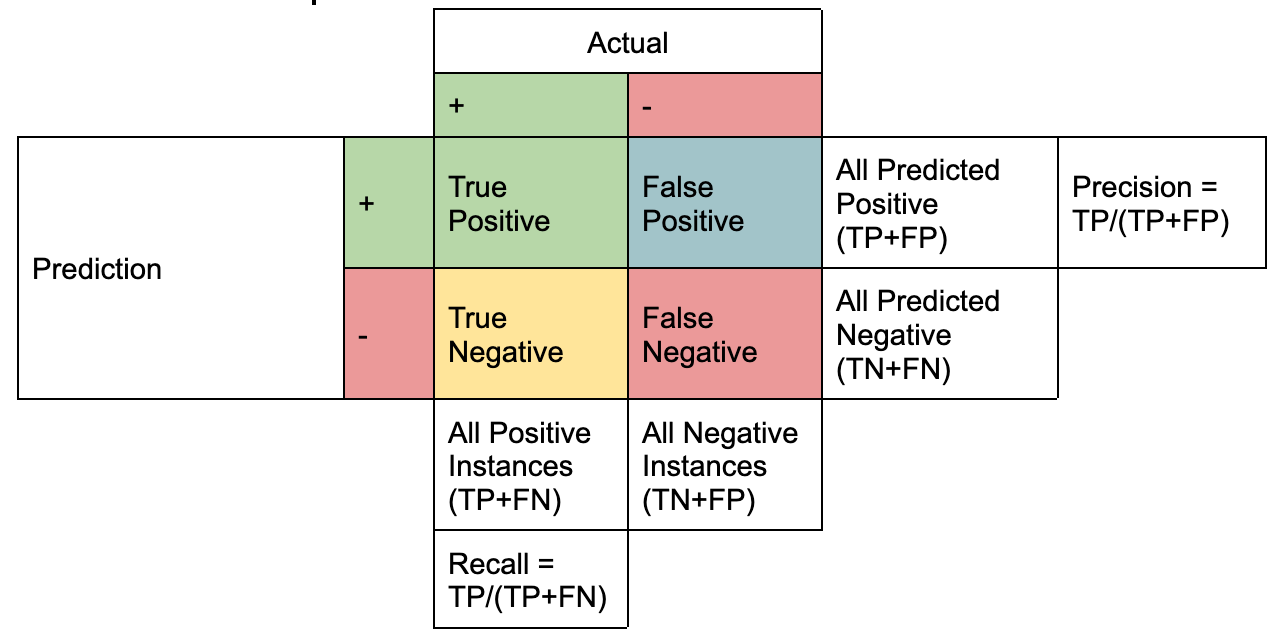

<footnote>Source: https://www.datacamp.com/tutorial/precision-recall-curve-tutorial</footnote>

Recall that Micro-average is average when putting all the data together, which is the sum of TP for each class divided by the sum of TP and FP/FN.


\begin{equation}
\text{Micro-Averaged Precision} = \frac{\sum_{i=1}^{N} \text{True Positives}_{Ci}}{\sum_{i=1}^{N} (\text{True Positives}_{Ci} + \text{False Positives}_{Ci})}
\end{equation}

\begin{equation}
\text{Micro-Averaged Recall} = \frac{\sum_{i=1}^{N} \text{True Positives}_{Ci}}{\sum_{i=1}^{N} (\text{True Positives}_{Ci} + \text{False Negatives}_{Ci})}
\end{equation}


Macro-average, the average on the results per class, which is summing all the pre class precisions/recalls and divided by the total number of classes.

\begin{equation}
\text{Macro-Averaged Precision} = \frac{1}{N} \sum_{i=1}^{N} \text{Precision}_{Ci}
\end{equation}

\begin{equation}
\text{Macro-Averaged Recall} = \frac{1}{N} \sum_{i=1}^{N} \text{Recall}_{Ci}
\end{equation}


\begin{align*}
N & : \text{Number of classes}
\end{align*}






####**i. Logistic Regression Model**

#####**Train and Test**

**Train**

In [ ]:
ave_accuracy_lr = train(ModelLR, lr_X, lr_y) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_lr) # print average accuracy

Average accuracy: 0.9157986111111112


**Test**

In [ ]:
y_pred_lr = ModelLR.predict(X_test_lr) # evaluate the model using test set
cm_lr = confusion_matrix(y_test_lr, y_pred_lr) # define a confusion matrix on the result

**Defined ConfusionMatrix**

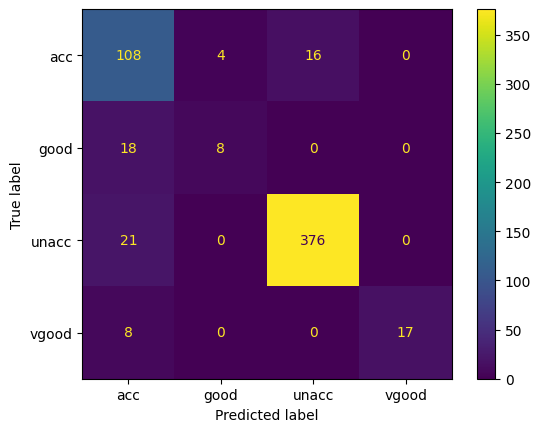

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=ModelLR.classes_) # Display Confusion Matrix
disp.plot()

We can see that we miss a lot of positive predictions on class good, which will cost the recall score on class good becomes low.

In [ ]:
accuracy_lr = sk.metrics.accuracy_score(y_test_lr, y_pred_lr) # the overall accuracy score on test set
accuracy_lr

0.8836805555555556

#####**Evaluation**




######**Precision and Recalls**





In [ ]:
labels = unique_labels(y_test_lr, y_pred_lr) #generate all the class labels

- **Per class precisions**

In [ ]:
#define the precision score on every class
precisions_lr = precision_score(y_test_lr, y_pred_lr, average=None)
#print precision for each class
for label, precision in zip(labels, precisions_lr):
    print(f'Precision for class {label}: {precision}')

Precision for class acc: 0.6967741935483871
Precision for class good: 0.6666666666666666
Precision for class unacc: 0.9591836734693877
Precision for class vgood: 1.0


- **Per class recalls**

In [ ]:
#define the recall score on every class
recalls_lr = recall_score(y_test_lr, y_pred_lr, average=None)
#print recall for each class
for label, recall in zip(labels, recalls_lr):
    print(f'Recall for class {label}: {recall}')

Recall for class acc: 0.84375
Recall for class good: 0.3076923076923077
Recall for class unacc: 0.947103274559194
Recall for class vgood: 0.68



######**Micro-average and Macro-average**

> Macro averages

In [ ]:
#define the precision score on Macro averages
macro_precision_lr = precision_score(y_test_lr, y_pred_lr, average='macro')
#print precision score on Macro averages
print('Precision:', macro_precision_lr)

Precision: 0.8306561334211103


In [ ]:
#define the recall score on Macro averages
macro_recall_lr = recall_score(y_test_lr, y_pred_lr, average='macro')

print('Recall:', macro_recall_lr)

Recall: 0.6946363955628755


> Micro averages

In [ ]:
#define the precision score on micro averages
micro_precision_lr = precision_score(y_test_lr, y_pred_lr, average='micro')

print('Precision:', micro_precision_lr)

Precision: 0.8836805555555556


In [ ]:
#define the recall score on micro averages
micro_recall_lr = recall_score(y_test_lr, y_pred_lr, average='micro')

print('Recall:', micro_recall_lr)

Recall: 0.8836805555555556


####**ii. Naïve Bayes Model**

#####**Train and Test**

**Train**

In [ ]:
ave_accuracy_nb = train(ModelNB, nb_X, nb_y) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_nb) # print average accuracy

Average accuracy: 0.8858506944444444


**Test**

In [ ]:
y_pred_nb = ModelNB.predict(X_test_nb) # evaluate the model using test set
cm_nb = confusion_matrix(y_test_nb, y_pred_nb) # define a confusion matrix on the result

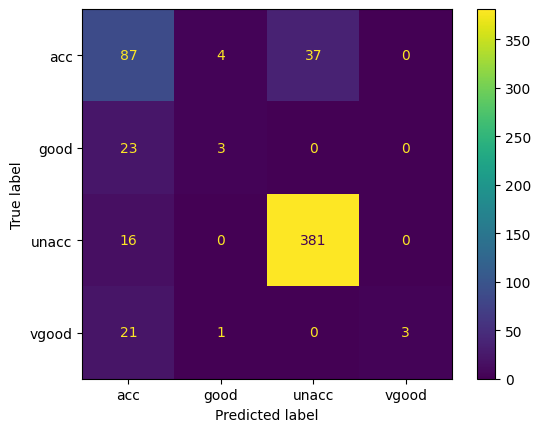

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=ModelNB.classes_)
disp.plot()

In [ ]:
accuracy_nb = sk.metrics.accuracy_score(y_test_nb, y_pred_nb) # the overall accuracy score on test set
accuracy_nb

0.8229166666666666

#####**Evaluation**

######**Precision and Recalls**

**Per class precisions**

In [ ]:
#define the precision score on every class
precisions_nb = precision_score(y_test_nb, y_pred_nb, average=None)

for label, precision in zip(labels, precisions_nb):
    print(f'Precision for class {label}: {precision}')


Precision for class acc: 0.5918367346938775
Precision for class good: 0.375
Precision for class unacc: 0.9114832535885168
Precision for class vgood: 1.0


In [ ]:
#define the recall score on every class
recalls_nb = recall_score(y_test_nb, y_pred_nb, average=None)

for label, recall in zip(labels, recalls_nb):
    print(f'Recall for class {label}: {recall}')

Recall for class acc: 0.6796875
Recall for class good: 0.11538461538461539
Recall for class unacc: 0.9596977329974811
Recall for class vgood: 0.12




---


######**Micro-average and Macro-average**

- Macro averages

In [ ]:
#precision
macro_precision_nb = precision_score(y_test_nb, y_pred_nb, average='macro')

print('Precision:', macro_precision_nb)

Precision: 0.7195799970705986


In [ ]:
#recall
macro_recall_nb = recall_score(y_test_nb, y_pred_nb, average='macro')

print('Recall:', macro_recall_nb)

Recall: 0.4686924620955242


- Micro averages

In [ ]:
#precision
micro_precision_nb = precision_score(y_test_nb, y_pred_nb, average='micro')

print('Precision:', micro_precision_nb)

Precision: 0.8229166666666666


In [ ]:
#recall
micro_recall_nb = recall_score(y_test_nb, y_pred_nb, average='micro')

print('Recall:', micro_recall_nb)

Recall: 0.8229166666666666




---



##Define the graph

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

# Create a DataFrame to display precision for both models
data_Precision = {
    'LR Precision': precisions_lr,
    'NB Precision': precisions_nb,

}
# Create a DataFrame to display recall for both models
data_Recall = {

    'LR Recall': recalls_lr,
    'NB Recall': recalls_nb,
}
#define the table for each
df_Recall = pd.DataFrame(data_Recall, index=labels)
df_Precision = pd.DataFrame(data_Precision, index=labels)

# Create a DataFrame to display micro/macro-average for both models
index = ['Logistic Regression Model', 'Naïve Bayes Model']
data = {

    'Pre_Mac': [macro_precision_lr,macro_precision_nb],
    'Rec_Mac': [macro_recall_lr, macro_recall_nb],
    'Pre_Mic': [micro_precision_lr,micro_precision_nb],
    'Rec_Mic': [ micro_recall_lr,micro_recall_nb],
}
#define the table
df_MacMic = pd.DataFrame(data, index = index)



---



####**iii. Comparative evaluation**

In [ ]:
df_Precision.T

,acc,good,unacc,vgood
LR Precision,0.696774,0.666667,0.959184,1.0
NB Precision,0.591837,0.375000,0.911483,1.0


In [ ]:
df_Recall.T

,acc,good,unacc,vgood
LR Recall,0.843750,0.307692,0.947103,0.68
NB Recall,0.679688,0.115385,0.959698,0.12


In [ ]:
df_MacMic

,Pre_Mac,Rec_Mac,Pre_Mic,Rec_Mic
Logistic Regression Model,0.830656,0.694636,0.883681,0.883681
Naïve Bayes Model,0.719580,0.468692,0.822917,0.822917


The micro averages for both models are generally higher than the macro averages.

> Class value distribution

`Class distrpution on training set`
`{'acc': 256, 'good': 43, 'unacc': 813, 'vgood': 40}`

`Class distrpution on testing set`
`{'acc': 128, 'good': 26, 'unacc': 397, 'vgood': 25}`

We can see that our training set has an imbalanced class distribution, where "good" and "vgood" only count around 3% of the total training samples.
We saw that macro averages will weighted **each class** equally, regardless of their frequency or size. Therefore, it is more sensitive to the performance, which each class contribute 1/4 of the performance while some classes only weight around 3% of the total samples.

Micro-average, on the other hand, gives equal weight to each sample in a dataset. It is calculated by summing the values for each class and dividing it by the total number of instances. In other words, it takes into account the performance of each class equally and treats them as a single entity. Therefore, it is less sensitive to the performance, which
it considers the overall performance of each sample so the ones that have a bad performance only contribute around 3% of the total samples.

In the case of LR and NB, both micro-averages are much higher than the macro-average. The reason for this is that the micro-average provides us with the overall accuracy performance. The precision/recall rate for the "uacc" class is very high. Therefore, if the model performs well on the "uacc" class, it will pull up the overall average as it contributes to most of the samples. It can be seen that there are two recall rates that are very low for NB (both around 0.10). If we only consider the micro-average, we might overestimate our model's performance for NB, as it contributes a small amount to the calculation.

In our case of evaluation, we want to focus more on the preference for each class. For example, if the model is good at predicting the first 100 samples of one class and the rest of the data samples are just similar to the first 100 samples, then we might not consider them since the overall prediction will be the same. As a result, we will overestimate the performance.

Macro-average, in our imbalanced distribution of classes, will give a better performance result as it ensures that each class contributes equally to the overall average.

##**6. Modify some parameters, and perform a train/test/evaluate again**

####**i. Logistic Regression Model**

##### **Model 1**

- `multi_class='ovr'` The model will use a one-vs-rest strategy, which means fitting a binary model for each class.
- `solver='newton-cholesky'` is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories.
- `class_weight="balanced"` This will adjust weights inversely proportional to class frequencies in the input data.
- `C=5` Apply a regularization of 5. A higher value of C means less regularization, which means the model will try to fit the training data as well as possible.
- `max_iter=500` Maximum number of iterations for the solver to converge. This is only set to have a equal comparison with model 2.

In [ ]:
# define the Logistic Regression model with the above parameters
ModelLR_1 = LogisticRegression(multi_class='ovr', solver='newton-cholesky',class_weight="balanced", C= 5,max_iter=500)

In [ ]:
ave_accuracy_lr1 = train(ModelLR_1, lr_X, lr_y) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_lr1) # print average accuracy

Average accuracy: 0.8912037037037037


**Test**

In [ ]:
y_pred_lr_1 = ModelLR_1.predict(X_test_lr) # evaluate the model using test set
cm_lr1 = confusion_matrix(y_test_lr, y_pred_lr_1) # define a confusion matrix on the result

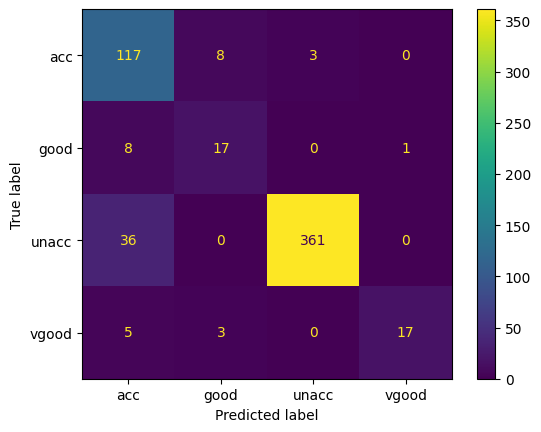

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr1, display_labels=ModelLR_1.classes_)
disp.plot()

In [ ]:
accuracy_lr1 = sk.metrics.accuracy_score(y_test_lr, y_pred_lr_1) # the overall accuracy score on test set
accuracy_lr1

0.8888888888888888

######**Precision and Recalls**





**Per class precisions**

In [ ]:
#define the precision score on every class
precisions_lr_1 = precision_score(y_test_lr, y_pred_lr_1, average=None)

for label, precision in zip(labels, precisions_lr_1):
    print(f'Precision for class {label}: {precision}')

Precision for class acc: 0.7048192771084337
Precision for class good: 0.6071428571428571
Precision for class unacc: 0.9917582417582418
Precision for class vgood: 0.9444444444444444


**Per class recalls**

In [ ]:
#define the recall score on every class
recalls_lr_1 = recall_score(y_test_lr, y_pred_lr_1, average=None)

for label, recall in zip(labels, recalls_lr_1):
    print(f'Recall for class {label}: {recall}')

Recall for class acc: 0.9140625
Recall for class good: 0.6538461538461539
Recall for class unacc: 0.9093198992443325
Recall for class vgood: 0.68


######**Micro-average and Macro-average**

**Precision calculation**

- Macro averages

In [ ]:
#precision
macro_precision_lr_1 = precision_score(y_test_lr, y_pred_lr_1, average='macro')

print('Precision:', macro_precision_lr_1)

Precision: 0.8120412051134942


In [ ]:
#recall
macro_recall_lr_1 = recall_score(y_test_lr, y_pred_lr_1, average='macro')

print('Recall:', macro_recall_lr_1)

Recall: 0.7893071382726217


- Micro averages

In [ ]:
#precision
micro_precision_lr_1 = precision_score(y_test_lr, y_pred_lr_1, average='micro')

print('Precision:', micro_precision_lr_1)

Precision: 0.8888888888888888


In [ ]:
#recall
micro_recall_lr_1 = recall_score(y_test_lr, y_pred_lr_1, average='micro')

print('Recall:', micro_recall_lr_1)

Recall: 0.8888888888888888


#####**Model 2**

- `multi_class='multinomial'` The model will use the softmax function.
- `solver='lbfgs'` handle multinomial loss
- `class_weight="balanced"` The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
- `max_iter=500` Maximum number of iterations taken for the 'lbfgs' solvers.
- `C=5` Apply a regularization of 10. A higher value of C means less regularization, which means the model will try to fit the training data as well as possible.

**Train**

In [ ]:
# assign the parameters into the model
ModelLR_2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight="balanced", max_iter=500, C=5)

In [ ]:
ave_accuracy_lr2 = train(ModelLR_2, lr_X, lr_y) # train the model using the 4-fold
print("Average accuracy:", ave_accuracy_lr2)

Average accuracy: 0.898654513888889


**Test**

In [ ]:
y_pred_lr_2 = ModelLR_2.predict(X_test_lr) # evaluate the model using the test set
cm_lr2 = confusion_matrix(y_test_lr, y_pred_lr_2)# build a confusion matrix on the result

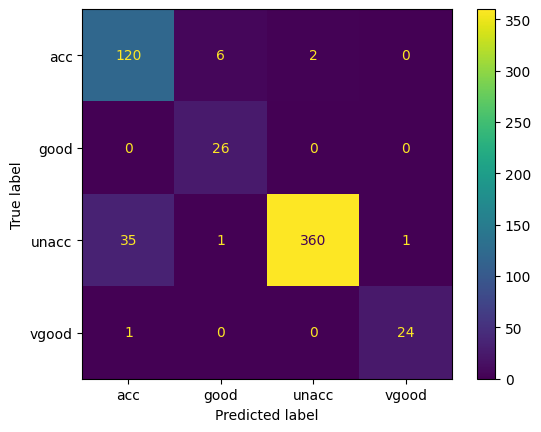

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr2, display_labels=ModelLR_2.classes_)
disp.plot()# display the confusion matrix

In [ ]:
accuracy_lr2 = sk.metrics.accuracy_score(y_test_lr, y_pred_lr_2) # generate the accuracy score of the predicted
accuracy_lr2

0.9201388888888888



---


######**Precision and Recalls**




**Per class precisions**


In [ ]:
precisions_lr_2 = precision_score(y_test_lr, y_pred_lr_2, average=None)
#define the precision score on every class
for label, precision in zip(labels, precisions_lr_2):
    print(f'Precision for class {label}: {precision}')

Precision for class acc: 0.7692307692307693
Precision for class good: 0.7878787878787878
Precision for class unacc: 0.994475138121547
Precision for class vgood: 0.96


**Per class recalls**


In [ ]:
recalls_lr_2 = recall_score(y_test_lr, y_pred_lr_2, average=None)
#define the recall score on every class
for label, recall in zip(labels, recalls_lr_2):
    print(f'Recall for class {label}: {recall}')

Recall for class acc: 0.9375
Recall for class good: 1.0
Recall for class unacc: 0.906801007556675
Recall for class vgood: 0.96




---


###### **Micro-average and Macro-average**

- Macro averages

In [ ]:
#precision
macro_precision_lr_2 = precision_score(y_test_lr, y_pred_lr_2, average='macro')
print('Macro Precision:', macro_precision_lr_2)

Macro Precision: 0.8778961738077761


In [ ]:
#recall
macro_recall_lr_2 = recall_score(y_test_lr, y_pred_lr_2, average='macro')

print('Recall:', macro_recall_lr_2)

Recall: 0.9510752518891687


- Micro averages

In [ ]:
#precision
micro_precision_lr_2 = precision_score(y_test_lr, y_pred_lr_2, average='micro')

print('Micro Precision:', micro_precision_lr_2)

Micro Precision: 0.9201388888888888


In [ ]:
#recall
micro_recall_lr_2 = recall_score(y_test_lr, y_pred_lr_2, average='micro')

print('Recall:', micro_recall_lr_2)

Recall: 0.9201388888888888




---



####**ii. Naïve Bayes Model**

#####**Model 1**

- `alpha=0.5` the smoothing parameter. It controls the rate at which the influence of the observations at prior time steps decay exponentially
- `fit_prior=True` This means that the classifier will learn class prior probabilities from the training data.


In [ ]:
ModelNB_1 = CategoricalNB(alpha=0.5,  fit_prior=True) # apply the parameter to the model

In [ ]:
ave_accuracy_nb1 = train(ModelNB_1, nb_X, nb_y) # train the model using the 4-fold
print("Average accuracy:", ave_accuracy_nb1)

Average accuracy: 0.890625


**Test**

In [ ]:
y_pred_nb_1 = ModelNB_1.predict(X_test_nb) # test the model
cm_nb1 = confusion_matrix(y_test_nb, y_pred_nb_1)

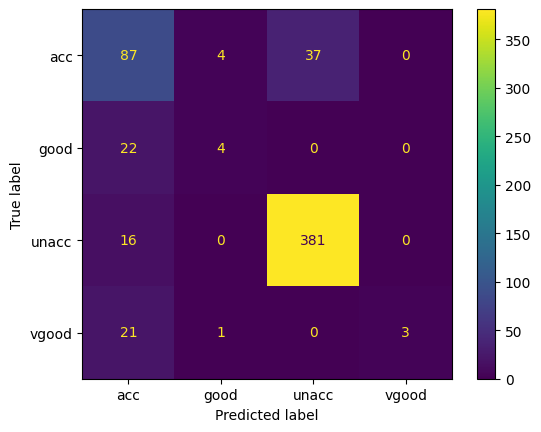

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb1, display_labels=ModelNB.classes_) # display the confusion_matrix
disp.plot()

In [ ]:
accuracy_nb1 = sk.metrics.accuracy_score(y_test_nb, y_pred_nb_1) # show accuracy score
accuracy_nb1

0.8246527777777778

######**Precision and Recalls**





**Per class precisions**

In [ ]:
precisions_nb_1 = precision_score(y_test_nb, y_pred_nb_1, average=None)
#define the precision score on every class
for label, precision in zip(labels, precisions_nb_1):
    print(f'Precision for class {label}: {precision}')

Precision for class acc: 0.5958904109589042
Precision for class good: 0.4444444444444444
Precision for class unacc: 0.9114832535885168
Precision for class vgood: 1.0


**Per class recalls**

In [ ]:
recalls_nb_1 = recall_score(y_test_nb, y_pred_nb_1, average=None)
#define the recall score on every class
for label, recall in zip(labels, recalls_nb_1):
    print(f'Recall for class {label}: {recall}')

Recall for class acc: 0.6796875
Recall for class good: 0.15384615384615385
Recall for class unacc: 0.9596977329974811
Recall for class vgood: 0.12


######**Micro-average and Macro-average**

- Macro averages

In [ ]:
#precision
macro_precision_nb_1 = precision_score(y_test_nb, y_pred_nb_1, average='macro')

print('Precision:', macro_precision_nb_1)

Precision: 0.7379545272479664


In [ ]:
#recall
macro_recall_nb_1 = recall_score(y_test_nb, y_pred_nb_1, average='macro')

print('Recall:', macro_recall_nb_1)

Recall: 0.47830784671090876


- Micro averages

In [ ]:
#precision
micro_precision_nb_1 = precision_score(y_test_nb, y_pred_nb_1, average='micro')

print('Precision:', micro_precision_nb_1)

Precision: 0.8246527777777778


In [ ]:
#recall
micro_recall_nb_1 = recall_score(y_test_nb, y_pred_nb_1, average='micro')

print('Recall:', micro_recall_nb_1)

Recall: 0.8246527777777778




---


#####**Model 2**

- `alpha=0`no smoothing is applied.  
- `fit_prior=False` uniform prior probabilities will be used.
- `force_alpha=True` If False and alpha is less than 1e-10, it will set alpha to
1e-10. If True, alpha will remain unchanged. This may cause
numerical errors if alpha is too close to 0.

In [ ]:
ModelNB_2 = CategoricalNB(alpha=0, fit_prior=False, force_alpha=True) #define the model with the applied parameters

In [ ]:
ave_accuracy_nb2 = train(ModelNB_2, nb_X, nb_y) #train
print("Average accuracy:", ave_accuracy_nb2)
#please ignored the warning

Average accuracy: 0.8770254629629629


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:1521: RuntimeWarning: divide by zero encountered in log
  np.log(smoothed_cat_count) - np.log(smoothed_class_count.reshape(-1, 1))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:1521: RuntimeWarning: divide by zero encountered in log
  np.log(smoothed_cat_count) - np.log(smoothed_class_count.reshape(-1, 1))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:1521: RuntimeWarning: divide by zero encountered in log
  np.log(smoothed_cat_count) - np.log(smoothed_class_count.reshape(-1, 1))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:1521: RuntimeWarning: divide by zero encountered in log
  np.log(smoothed_cat_count) - np.log(smoothed_class_count.reshape(-1, 1))


**Test**

In [ ]:
y_pred_nb_2 = ModelNB_2.predict(X_test_nb) #test
cm_nb2 = confusion_matrix(y_test_nb, y_pred_nb_2)

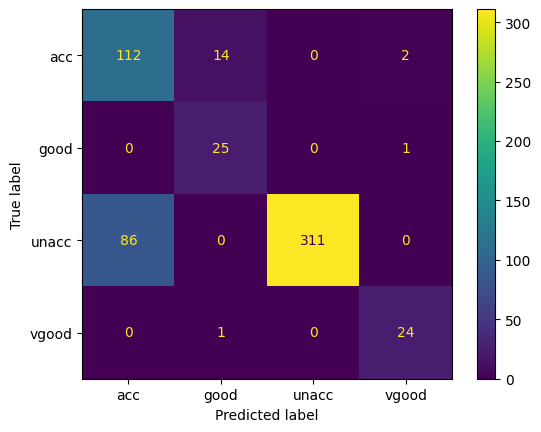

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb2, display_labels=ModelNB.classes_) #show confusion_matrix
disp.plot()

In [ ]:
accuracy_nb2 = sk.metrics.accuracy_score(y_test_nb, y_pred_nb_2) # show accuracy_score
accuracy_nb2

0.8194444444444444

######**Precision and Recalls**





**Per class precisions**

In [ ]:
precisions_nb_2 = precision_score(y_test_nb, y_pred_nb_2, average=None)
#show the pre class precision
for label, precision in zip(labels, precisions_nb_2):
    print(f'Precision for class {label}: {precision}')

Precision for class acc: 0.5656565656565656
Precision for class good: 0.625
Precision for class unacc: 1.0
Precision for class vgood: 0.8888888888888888


**Per class recalls**

In [ ]:
recalls_nb_2 = recall_score(y_test_nb, y_pred_nb_2, average=None)
#show the pre class recall
for label, recall in zip(labels, recalls_nb_2):
    print(f'Recall for class {label}: {recall}')

Recall for class acc: 0.875
Recall for class good: 0.9615384615384616
Recall for class unacc: 0.783375314861461
Recall for class vgood: 0.96


######**Micro-average and Macro-average**

- Macro averages

In [ ]:
#precision
macro_precision_nb_2 = precision_score(y_test_nb, y_pred_nb_2, average='macro')

print('Precision:', macro_precision_nb_2)

Precision: 0.7698863636363636


In [ ]:
#recall
macro_recall_nb_2 = recall_score(y_test_nb, y_pred_nb_2, average='macro')

print('Recall:', macro_recall_nb_2)

Recall: 0.8949784440999806


- Micro averages

In [ ]:
# precision
micro_precision_nb_2 = precision_score(y_test_nb, y_pred_nb_2, average='micro')

print('Precision:', micro_precision_nb_2)

Precision: 0.8194444444444444


In [ ]:
# recall
micro_recall_nb_2 = recall_score(y_test_nb, y_pred_nb_2, average='micro')

print('Recall:', micro_recall_nb_2)

Recall: 0.8194444444444444




---



##**Define the performance graph**

In [ ]:
def pr_curve(model, X_test, y_test,  title):

  # define 2 dictionary that stores the precision/recall scourse for each class
  precision = dict()
  recall = dict()

  #define the predict proba
  y_prob = model.predict_proba(X_test)

  #y_test_binarized = label_binarize(y_test, classes=np.arange(len(model.classes_)))

  # define the color lines
  colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue']

  for class_idx in range(len(model.classes_)):
      precision[class_idx], recall[class_idx], _= precision_recall_curve(
          y_test == model.classes_[class_idx], y_prob[:, class_idx])


  # Plot the precision-recall curve for each class
  for class_idx, color in zip(range(len(model.classes_)), colors):
      # plot the curve for each class
      plt.plot(recall[class_idx], precision[class_idx], color=color, lw=2, label=model.classes_[class_idx])

  # add x-y labels and title
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve for %s Classification Model' %title)
  plt.plot([0, 1], [0.5, 0.5],'--',label='baseline')

  plt.legend(loc='best')
  plt.show()

In [ ]:
index = ['LR',  'LR1', 'LR2', 'NB', 'NB1', 'NB2']

# define the micro/macro-average table for each model
data = {

    'Pre_Mac': [macro_precision_lr, macro_precision_lr_1, macro_precision_lr_2, macro_precision_nb, macro_precision_nb_1, macro_precision_nb_2],
    'Rec_Mac': [macro_recall_lr,  macro_recall_lr_1, macro_recall_lr_2, macro_recall_nb, macro_recall_nb_1, macro_recall_nb_2],
    'Pre_Mic': [micro_precision_lr,  micro_precision_lr_1, micro_precision_lr_2, micro_precision_nb,micro_precision_nb_1, micro_precision_nb_2],
    'Rec_Mic': [micro_recall_lr,  micro_recall_lr_1, micro_recall_lr_2, micro_recall_nb, micro_recall_nb_1, micro_recall_nb_2],
    'ave_accuracy': [ave_accuracy_lr, ave_accuracy_lr1, ave_accuracy_lr2, ave_accuracy_nb, ave_accuracy_nb1, ave_accuracy_nb2],
    'test_accuracy': [accuracy_lr, accuracy_lr1, accuracy_lr2, accuracy_nb, accuracy_nb1, accuracy_nb2]
}

df_MacMic_2 = pd.DataFrame(data, index = index)

In [ ]:
# define the table of performance precisions on each class for all model
data1 = {

    'acc': [precisions_lr[0], precisions_lr_1[0], precisions_lr_2[0], precisions_nb[0], precisions_nb_1[0], precisions_nb_2[0]],
    'good': [precisions_lr[1], precisions_lr_1[1], precisions_lr_2[1], precisions_nb[1], precisions_nb_1[1], precisions_nb_2[1]],
    'unacc': [precisions_lr[2], precisions_lr_1[2], precisions_lr_2[2], precisions_nb[2], precisions_nb_1[2], precisions_nb_2[2]],
    'vgood': [precisions_lr[3], precisions_lr_1[3], precisions_lr_2[3], precisions_nb[3], precisions_nb_1[3], precisions_nb_2[3]],

}

df_Pre = pd.DataFrame(data1, index = index)

In [ ]:
# define the table of performance recalls on each class for all model
data2 = {

    'acc': [recalls_lr[0], recalls_lr_1[0], recalls_lr_2[0], recalls_nb[0], recalls_nb_1[0], recalls_nb_2[0]],
    'good': [recalls_lr[1], recalls_lr_1[1], recalls_lr_2[1], recalls_nb[1], recalls_nb_1[1], recalls_nb_2[1]],
    'unacc': [recalls_lr[2], recalls_lr_1[2], recalls_lr_2[2], recalls_nb[2], recalls_nb_1[2], recalls_nb_2[2]],
    'vgood': [recalls_lr[3], recalls_lr_1[3], recalls_lr_2[3], recalls_nb[3], recalls_nb_1[3], recalls_nb_2[3]],

}

df_Rec = pd.DataFrame(data2, index = index)



---



##**7. Analyze the obtained results**

> Class value distribution

`Class distrpution on training set`
`{'acc': 256, 'good': 43, 'unacc': 813, 'vgood': 40}`

> Compare quantitatively precision measures

In [ ]:
df_Pre

,acc,good,unacc,vgood
LR,0.696774,0.666667,0.959184,1.000000
LR1,0.704819,0.607143,0.991758,0.944444
LR2,0.769231,0.787879,0.994475,0.960000
NB,0.591837,0.375000,0.911483,1.000000
NB1,0.595890,0.444444,0.911483,1.000000
NB2,0.565657,0.625000,1.000000,0.888889


> Compare quantitatively with the recall measures

In [ ]:
df_Rec

,acc,good,unacc,vgood
LR,0.843750,0.307692,0.947103,0.68
LR1,0.914062,0.653846,0.909320,0.68
LR2,0.937500,1.000000,0.906801,0.96
NB,0.679688,0.115385,0.959698,0.12
NB1,0.679688,0.153846,0.959698,0.12
NB2,0.875000,0.961538,0.783375,0.96


###**Logistic Regression & Naive Bayes Model with the default parameters**

**Initial Model**

Let's consider the overall evaluation on the initial models between Logistic Regression (LR) and Naive Bayes (NB).

In [ ]:
df_Precision.T

,acc,good,unacc,vgood
LR Precision,0.696774,0.666667,0.959184,1.0
NB Precision,0.591837,0.375000,0.911483,1.0


In [ ]:
df_Recall.T

,acc,good,unacc,vgood
LR Recall,0.843750,0.307692,0.947103,0.68
NB Recall,0.679688,0.115385,0.959698,0.12


The precision and recall scores for the "uacc" class show excellent results for both models, which could be attributed to the larger number of training samples for this class.

However, when it comes to the "acc" class, the recall score is higher than the precision score, indicating that the models are quite good at identifying instances of the "acc" class but they also generate a significant number of false positive predictions for it. This might be because the features used for identifying the "acc" class are not specific enough and have some similarity with other classes such as "uacc". As a result, the models make more true positive predictions on the "acc" class than they should, leading to a lower precision score.

On the other hand, when it comes to identifying the "good" class, the models show a high level of precision but a low level of recall. This suggests that the models correctly identify instances of the "good" class (true positive), but they also miss many instances of it (false negative). This imbalance in the prediction can result in the models over-predicting one class and under-predicting another. In this case, the system is over-predicting the "acc" class, and that results in a high false-negative rate for the "good" class.

One possible explanation for this is the lack of training data for the "good" class. Although the models have learned from the other classes, they don't have enough data to accurately distinguish and classify the "good" class. It is also possible that there is a common feature used to classify "good" and "acc" classes, which leads to the models favoring one class over the other.

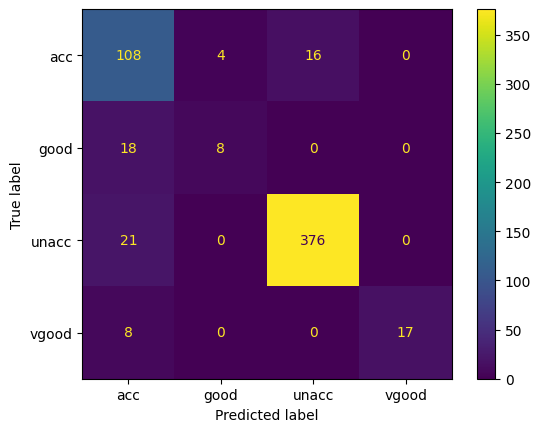

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=ModelLR.classes_) # Display Confusion Matrix
disp.plot()

From the confusion matrix of LR, we can see that the precision score for "good" is 8/8+4 = 0.66 and the recall score is 8/8+18 = 0.307, where 18 FN **was** come from class acc, which means the model is over predicting class acc.

*A Precision-Recall curve is a plot of the precision (y-axis) and the recall (x-axis)*

<img src="https://images.datacamp.com/image/upload/v1674126967/Precision_recall_curve_5076395f1c.jpg"></img>

Source: https://www.datacamp.com/tutorial/precision-recall-curve-tutorial

This trade-offs between precision and recall of increase one, the other tends to decrease, implying an imbalanced class distribution of our training set, which model may leading to poor performance on the minority class.

A precision-recall curve can helps us visualize this trade-offs precision and recall in order to analyze the performance of models dealing an imbalance dataset.

**We will mainly analyze the precision-recall curve on class *good* for each model to identify the performance of the model.**

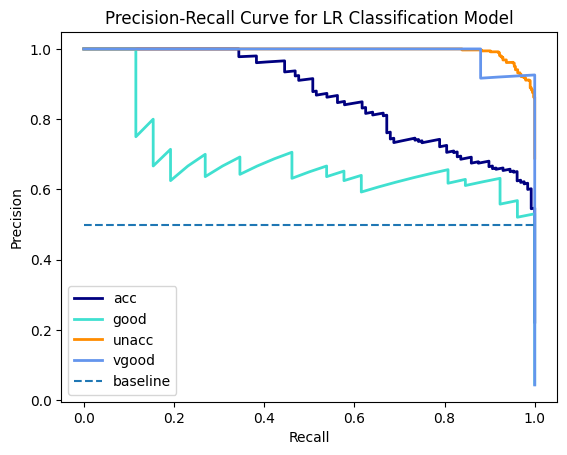

In [ ]:
pr_curve(ModelLR,X_test_lr, y_test_lr ,"LR")

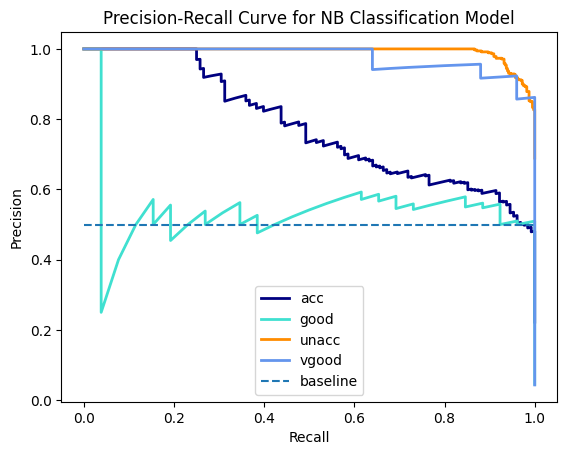

In [ ]:
pr_curve(ModelNB,X_test_nb, y_test_nb, "NB")

We can observe the precison recall curve for Naive Bayes is more sensitive than logistic regression. Naive Bayes is based on probabilistic reasoning and it more sensitive to the relative frequency of different samples, which can impact the threshold precision and recall.

An intresting observation is that the number of samples for **vgood** is similar to **good**, while the evaluation of precision/recall for **vgood** shows a decent . This could imply that there are distinctive or informative features that strongly correlate with the **vgood** class, making it easier for the model to differentiate between **vgood** and other classes.






###Logistic Regression Model

**Logistic Regression Model 1 (LR1)**
- `multi_class='ovr'` The model will use a one-vs-rest strategy, which means fitting a binary model for each class.
- `solver='newton-cholesky'` is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories.
- `class_weight="balanced"` This will adjust weights inversely proportional to class frequencies in the input data.
- `C=5` Apply a regularization of 5. A higher value of C means less regularization, which means the model will try to fit the training data as well as possible.
- `max_iter=500` Maximum number of iterations for the solver to converge. This is only set to have a equal comparison with model 2.

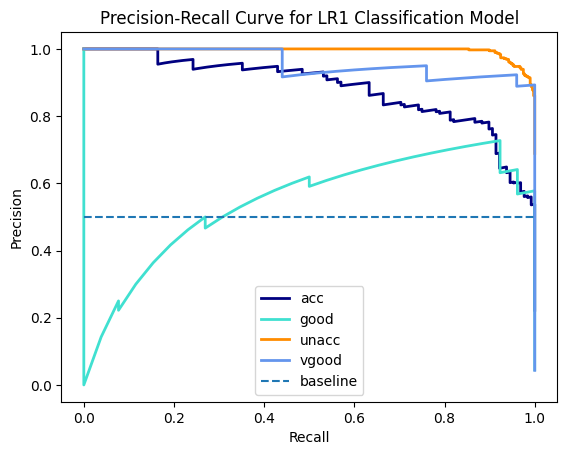

In [ ]:
pr_curve(ModelLR_1,X_test_lr, y_test_lr, "LR1")

In LR1, We can observed a high threshold of high precision and low recall, point (0,1).

\begin{equation}
\text{Precision}_{Ci} = \frac{\text{True Positives}_{Ci}}{\text{True Positives}_{Ci} + \text{False Positives}_{Ci}}
\end{equation}

\begin{equation}
\text{Recall}_{Ci} = \frac{\text{True Positives}_{C}}{\text{True Positives}_{Ci} + \text{False Negatives}_{Ci}}
\end{equation}

A high threshold denotes that the model is making fewer false positive predictions (increase precision rate) on the 'good' class. However, in doing so, it is also missing a significant number of true positive instances due to its overly selective nature in making positive predictions, leading to a higher number of false negatives. The model's use of a one-vs-rest (OvR) strategy poses a challenge in accounting for class imbalances, as it only focuses on the performance of each class against the rest and does not consider class balance. As a result, this strategy may not be well-suited to capture class imbalances, which leads a very high threshold on class good.

**Logistic Regression Model 2 (LR2)**

- `multi_class='multinomial'` The model will use the softmax function.
- `solver='lbfgs'` handle multinomial loss
- `class_weight="balanced"` The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
- `max_iter=500` Maximum number of iterations taken for the 'lbfgs' solvers.
- `C=5` Apply a regularization of 5. A higher value of C means less regularization, which means the model will try to fit the training data as well as possible.

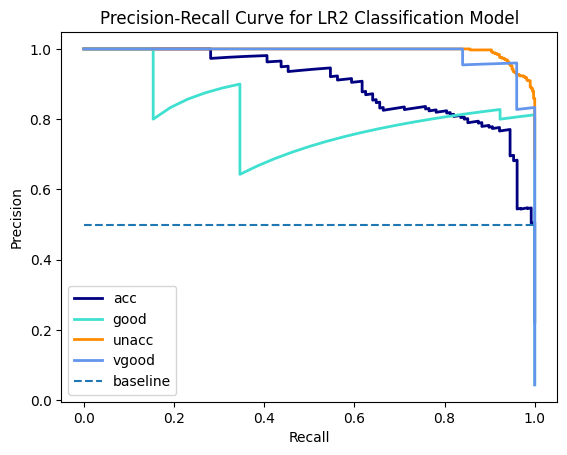

In [ ]:
pr_curve(ModelLR_2, X_test_lr, y_test_lr, "LR2")

The softmax function, on the other hand, provides the probability distribution over all classes. The class with the highest probailities will be the prediction. This helps the model inorder to determining the most likely class it belong over the other classes, which gives a balanced threshold on all the classes. The model didn't make many over predictions on one class over the other. As a result, LR2 gives a recall of 1 for class good and 0.96 for class vgood, while LR1 only has 0.65 for class good and 0.68 for class vgood.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCA5JrbjKNInMkU7uC3qgX78iOLre2e_jGgq3CPhaH3lgY2e0AnatyBCNZFBFw6EqJ_5c&usqp=CAU">


Source: https://towardsdatascience.com/softmax-activation-function-explained-a7e1bc3ad60

###Naïve Bayes Model

**Naïve Bayes Model 1 (NB1)**

- `alpha=0.5` the smoothing parameter. It controls the rate at which the influence of the observations at prior time steps decay exponentially
- `fit_prior=True` This means that the classifier will learn class prior probabilities from the training data.


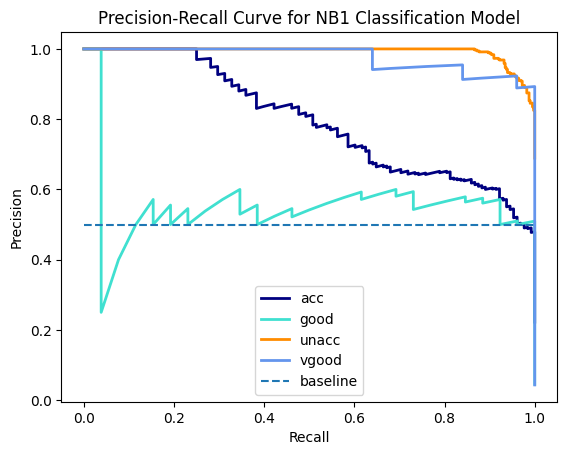

In [ ]:
pr_curve(ModelNB_1, X_test_nb, y_test_nb, "NB1")

**Naïve Bayes Model 2 (NB2)**
- `alpha=0`no smoothing is applied.  
- `fit_prior=False` uniform prior probabilities will be used.
- `force_alpha=True` set True, alpha will remain unchanged. This may cause
numerical errors if alpha is too close to 0.

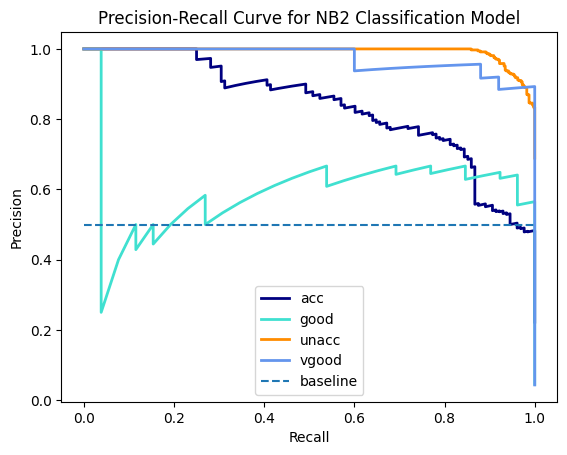

In [ ]:
pr_curve(ModelNB_2,X_test_nb, y_test_nb, "NB2")

The softmax function provides a probability distribution over all classes, with the class having the highest probability being the prediction. This helps the model by determining the most likely class it belongs to, ensuring a balanced threshold on all classes. This, in turn, results in fewer overpredictions on one class over the others. As a result, LR2 has a recall of 1 for class "good" and 0.96 for class "very good", while LR1 only has 0.65 for class "good" and 0.68 for class "very good".

###Micro and Macro Averages

In [ ]:
df_MacMic_2

,Pre_Mac,Rec_Mac,Pre_Mic,Rec_Mic,ave_accuracy,test_accuracy
LR,0.830656,0.694636,0.883681,0.883681,0.915799,0.883681
LR1,0.812041,0.789307,0.888889,0.888889,0.891204,0.888889
LR2,0.877896,0.951075,0.920139,0.920139,0.898655,0.920139
NB,0.719580,0.468692,0.822917,0.822917,0.885851,0.822917
NB1,0.737955,0.478308,0.824653,0.824653,0.890625,0.824653
NB2,0.769886,0.894978,0.819444,0.819444,0.877025,0.819444


**Average Accuracy vs. Test Accuracy**

Average accuracy is generally higher than test accuracy because it's the average of accuracy of each validation set during 4-fold cross-validation. Since during the process of cross-validation, each sample has be in the validation set at least once, therefore, the model has already be trained by the some samples in the validation set, resulting in an increase of the accuracy.

**Micro vs. Macro Averages**

We discussed that when working with an imbalanced dataset, using macro-average evaluation provides a more comprehensive assessment. When comparing the precision/recall micro-average for NB1 and NB2, it appears that they perform similarly. However, upon further analysis, NB1 tends to make more true positive predictions on the majority class, resulting in a very low recall rate for the minority class. In contrast, the macro-average captures this drawback of NB1, leading to a lower recall rate.

Furthermore, after comparing different models with varying classifier parameters, we found that LR2 and NB2 performed the best. However, upon comparing the macro-average of the two potential models, LR2 tended to provide better results for this dataset. Therefore, our results suggest that using LR2 as a discriminative classifier will yield the best classification performance.

# **References**

1. https://visualstudiomagazine.com/articles/2023/03/01/naive-bayes-scikit.aspx



2. https://www.tutorialspoint.com/logistic_regression_in_python/logistic_regression_in_python_preparing_data.htm


3. https://stackoverflow.com/questions/52892099/how-can-i-use-k-fold-cross-validation-in-scikit-learn-to-get-precision-recall-pe

4. https://refactored.ai/microcourse/notebook?path=content%2F06-Classification_models_in_Machine_Learning%2F02-Multivariate_Logistic_Regression%2Fmulticlass_logistic-regression.ipynb

5. https://www.datacamp.com/tutorial/understanding-logistic-regression-python

6. https://levelup.gitconnected.com/a-comprehensive-analysis-of-hyperparameter-optimization-in-logistic-regression-models-521564c1bfc0

7. https://saturncloud.io/blog/how-to-access-a-single-fold-in-scikitlearn-kfold/

8. https://sklearn-evaluation.ploomber.io/en/latest/classification/micro_macro.html

9. https://www.evidentlyai.com/classification-metrics/multi-class-metrics

10. https://www.educative.io/answers/what-is-the-difference-between-micro-and-macro-averaging

11. http://iamirmasoud.com/2022/06/19/understanding-micro-macro-and-weighted-averages-for-scikit-learn-metrics-in-multi-class-classification-with-example/

12. https://levelup.gitconnected.com/a-comprehensive-analysis-of-hyperparameter-optimization-in-logistic-regression-models-521564c1bfc0

13. https://medium.com/@sangha_deb/naive-bayes-vs-logistic-regression-a319b07a5d4c#:~:text=Both%20Naive%20Bayes%20and%20Logistic,was%20generated%20given%20the%20results.

14. https://www.baeldung.com/cs/naive-bayes-classification-performance

15. https://stats.stackexchange.com/questions/313549/why-decision-boundary-differs-between-multinomial-softmax-and-one-vs-rest-logi